In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [12]:
from fullFORCE import *

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
C:\Users\lab\AppData\Local\Temp\ipykernel_18556\2489711867.py:24: SyntaxWarning: invalid escape sequence '\o'
  labels = ['$\omega (t)$', '$f_{in}$', '$f_{hint}$', '$f_{out}$']


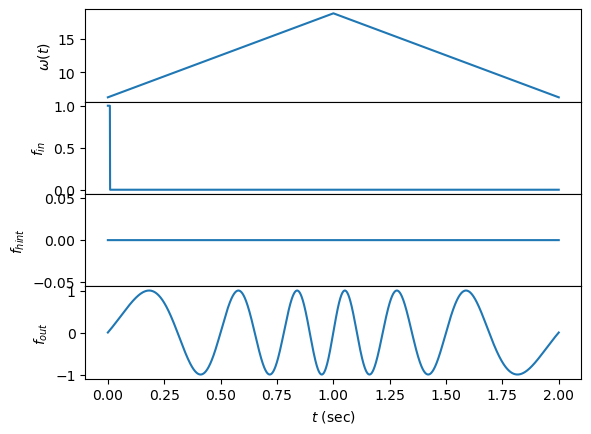

In [13]:
def inps_and_targs(dt, plot=False):
    t = np.linspace(0, 2, int(1./dt))
    
    omega = np.zeros(t.shape)
    omega[:int(t.shape[0]/2)] = np.linspace(2*np.pi, 6*np.pi, int(t.shape[0]/2))
    omega[int(t.shape[0]/2):] = np.flipud(omega[:int(t.shape[0]/2)]) # increasing decreasing (frequency of sin in fout)
    
    fout = np.zeros(t.shape)
    fout[:int(t.shape[0]/2)] = np.sin(omega[:int(t.shape[0]/2)] * t[:int(t.shape[0]/2)])
    fout[int(t.shape[0]/2):] = -np.flipud(fout[:int(t.shape[0]/2)])

    fhint = np.zeros(t.shape)

    fin = np.zeros(t.shape)
    fin[:10] = np.ones(10)

    fin = np.reshape(fin, (1, fin.size)).T
    fout = np.reshape(fout, (1, fout.size)).T
    fhint = np.reshape(fhint, (1, fhint.size)).T

    if plot:
        fig, axs = plt.subplots(4, 1, sharex=True)
        plt.subplots_adjust(hspace=0)
        labels = ['$\omega (t)$', '$f_{in}$', '$f_{hint}$', '$f_{out}$']
        for ax, y, label in zip(axs, [omega, fin, fhint, fout], labels):
            ax.plot(t, y)
            ax.set_ylabel(label)
        axs[-1].set_xlabel('$t$ (sec)')

    return (fin, fout, fhint)

dt = 0.0005 # 1/dt total timesteps
fin, fout, _ = inps_and_targs(dt, plot=True)

In [14]:
np.shape(fout)

(2000, 1)

In [15]:
p = create_default_params_rate()
p['dt'] = 1
p['total_time'] = 2000
p['run_time'] = 2000
p['training_loops'] = 10

### built in fullFORCE

In [16]:
net = fullFORCE(p)

In [17]:
xt, Hxt, errs, rel_errs, aux_targs, ufin, ufout = net.ff_Train(fin, fout)

Stabilizing networks...
2000
2000
2000
2000
2000
2000
Training network...
10 total trainings
training: 0
training: 1
training: 2
training: 3
training: 4
training: 5
training: 6
training: 7
training: 8
training: 9


TypeError: cannot unpack non-iterable NoneType object

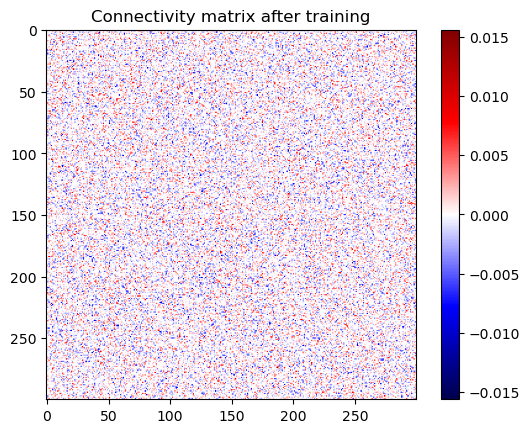

In [8]:
m = max(-1*np.min(net.W_trained), np.max(net.W_trained))

plt.imshow(net.W_trained, cmap=plt.get_cmap('seismic'), vmin = -m, vmax = m)
plt.title("Connectivity matrix after training")
plt.colorbar()

In [9]:
plt.plot(ufout[0])

NameError: name 'ufout' is not defined

In [11]:
n_plot = 10
nloop = p['training_loops']
timesteps = int(p['total_time']/p['dt'])
btp = 8

zt = np.matmul(net.W_trained, Hxt)

fig, axs = plt.subplots(n_plot + 1, 1, figsize = (12, 12), sharex = True)
for i in range(n_plot):
    # axs[i].plot(Hxt[i, 0:timesteps])
    # axs[i].plot(aux_targs[i, 0:timesteps])
    axs[i].plot(zt[i, (btp)*timesteps:(btp + 1)*timesteps])
    axs[i].plot(aux_targs[i, (btp)*timesteps:(btp + 1)*timesteps])

axs[n_plot].plot(net.W_out @ Hxt[:, (btp)*timesteps:(btp + 1)*timesteps])
axs[n_plot].plot(fout)

axs[0].set_title("Sample task-generating internal behavior")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 0 is different from 300)

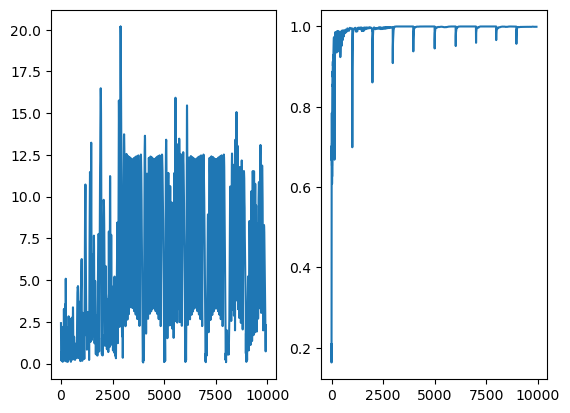

In [10]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(errs)
axs[1].plot(rel_errs)

In [15]:
x, Hx = net.run_rate(ufin)

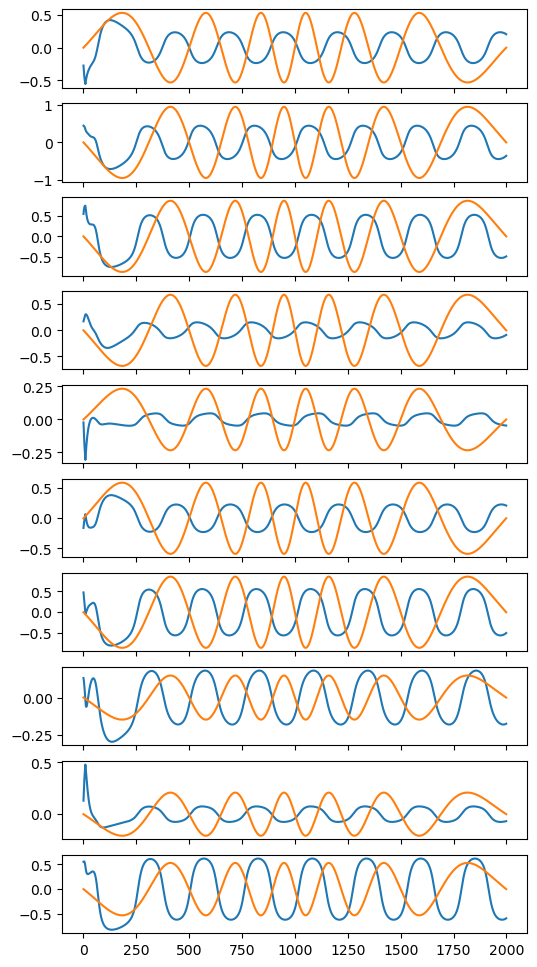

In [16]:
n_plot = 10
nloop = net.nloop
timesteps = int(net.run_time / net.dt)

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(Hx[i])
    axs[i].plot(ufout[i])
    #axs[i].plot(stim[i])